# Customer Churn Analysis

## 1. Objective
The objective of this analysis is to identify key factors contributing to customer churn and provide actionable insights to improve customer retention.

## 2. Business Context

Customer churn represents revenue loss and increased acquisition costs. 
Understanding why customers leave is critical for designing retention strategies and improving long-term profitability.

In [2]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load data
df=pd.read_excel("Telco_customer_churn.xlsx")
df_churn=df.copy()

In [3]:
df_churn

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


## 3. Data Overview

The dataset contains customer demographic information, service usage details, contract type, payment method, pricing information, and churn indicators.

Target Variable:
- Churn Value (0 = Retained, 1 = Churned)

In [4]:
# top 5 rows of dataset
df_churn.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [5]:
# dataset info
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [6]:
df_churn.shape

(7043, 33)

In [7]:
df_churn.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


## 4. Data Cleaning

- Converted 'Total Charges' to numeric
- Removed rows with invalid total charges
- Dropped irrelevant columns (CustomerID, geographic identifiers, redundant fields)
- Retained 23 relevant columns for analysis

In [12]:
df_churn["Total Charges"]=pd.to_numeric(df_churn["Total Charges"],errors="coerce")
df_churn=df_churn.dropna(subset="Total Charges")
df_churn.drop(columns=["CustomerID","Count","Country","State","City","Zip Code","Lat Long","Latitude","Longitude","Churn Label"],inplace=True)

In [14]:
# After cleaning 
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7032 non-null   object 
 1   Senior Citizen     7032 non-null   object 
 2   Partner            7032 non-null   object 
 3   Dependents         7032 non-null   object 
 4   Tenure Months      7032 non-null   int64  
 5   Phone Service      7032 non-null   object 
 6   Multiple Lines     7032 non-null   object 
 7   Internet Service   7032 non-null   object 
 8   Online Security    7032 non-null   object 
 9   Online Backup      7032 non-null   object 
 10  Device Protection  7032 non-null   object 
 11  Tech Support       7032 non-null   object 
 12  Streaming TV       7032 non-null   object 
 13  Streaming Movies   7032 non-null   object 
 14  Contract           7032 non-null   object 
 15  Paperless Billing  7032 non-null   object 
 16  Payment Method     7032 non-n

## 5. Overall Churn Rate

In [19]:
round(df_churn["Churn Value"].mean()*100,2)

np.float64(26.58)

The overall churn rate is approximately 26%, meaning roughly 1 in 4 customers leave the company.

## 6. Drivers of Customer Churn

### 6.1 Contract Type Impact

In [29]:
df_churn.groupby("Contract")["Churn Value"].mean()*100

Contract
Month-to-month    42.709677
One year          11.277174
Two year           2.848665
Name: Churn Value, dtype: float64

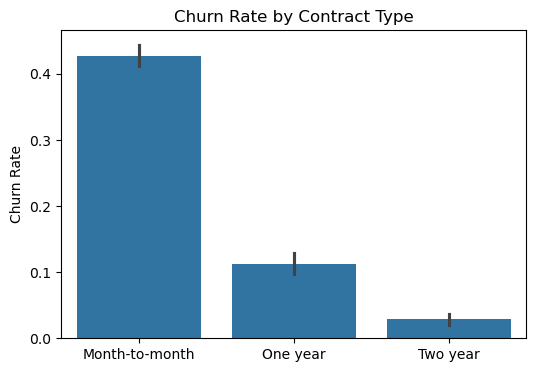

In [42]:
plt.figure(figsize=(6,4))
sns.barplot(x="Contract",y="Churn Value",data=df_churn,order=["Month-to-month","One year","Two year"])
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate")
plt.xlabel("")
plt.show()

### Observation
Customers on month-to-month contracts have a significantly higher churn rate (42.7%) compared to one-year (11.3%) and two-year contracts (2.8%).
### Interpretation
Customers without long-term contractual commitment are far more likely to leave the company.
### Business Implication
Encouraging customers to switch from month-to-month to longer-term contracts could substantially reduce churn.

### 6.2 Customer Tenure Impact

In [35]:
df_churn["Tenure Group"] = pd.cut(
    df_churn["Tenure Months"],
    bins=[0,12,24,48,72],
    labels=["0-12","12-24","24-48","48-72"]
)

df_churn.groupby("Tenure Group")["Churn Value"].mean()*100

C:\Users\saina\AppData\Local\Temp\ipykernel_13460\4100330102.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_churn.groupby("Tenure Group")["Churn Value"].mean()*100


Tenure Group
0-12     47.678161
12-24    28.710938
24-48    20.388959
48-72     9.513176
Name: Churn Value, dtype: float64

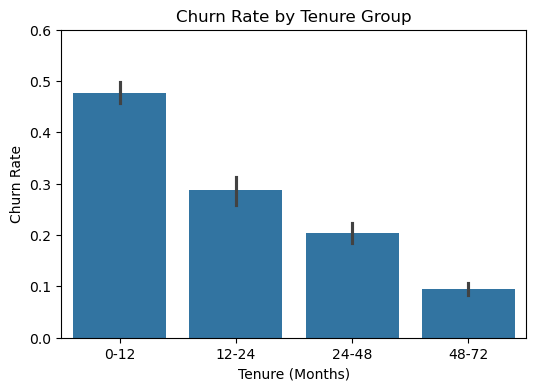

In [39]:
plt.figure(figsize=(6,4))
sns.barplot(x="Tenure Group", y="Churn Value", data=df_churn,
            order=["0-12","12-24","24-48","48-72"])
plt.title("Churn Rate by Tenure Group")
plt.ylabel("Churn Rate")
plt.xlabel("Tenure (Months)")
plt.ylim(0,0.6)
plt.show()

### Observation
Customers in their first 12 months churn at nearly 48%, with churn steadily decreasing as tenure increases.
### Interpretation
Churn risk is highest early in the customer lifecycle.
### Business Implication
Strengthening onboarding and first-year engagement strategies may substantially improve retention.

### 6.3 Pricing Impact (Monthly Charges)

In [48]:
df_churn.groupby("Churn Value")["Monthly Charges"].mean()

Churn Value
0    61.307408
1    74.441332
Name: Monthly Charges, dtype: float64

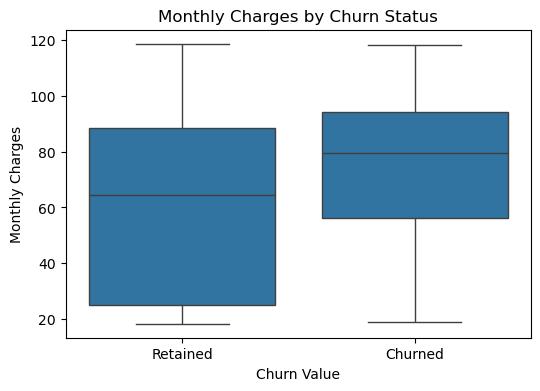

In [49]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Churn Value", y="Monthly Charges", data=df_churn)
plt.title("Monthly Charges by Churn Status")
plt.xticks([0,1], ["Retained","Churned"])
plt.show()

### Observation
Churned customers pay on average $74 compared to $61 for retained customers.
### Interpretation
Higher pricing tiers may increase churn probability.
### Business Implication
The company may need to reassess pricing perception, offer retention discounts, or better communicate value to high-paying customers.

### 6.4 Service Support Impact

In [52]:
df_churn.groupby("Tech Support")["Churn Value"].mean().sort_values(ascending=False)*100

Tech Support
No                     41.647465
Yes                    15.196078
No internet service     7.434211
Name: Churn Value, dtype: float64

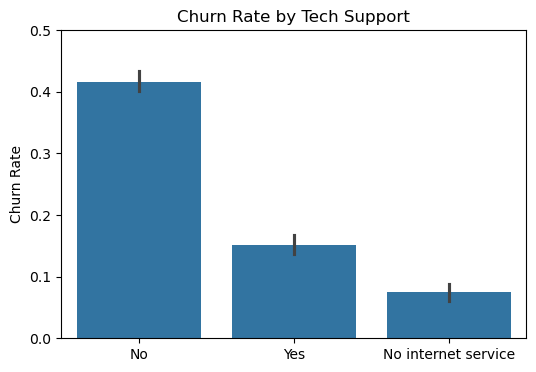

In [53]:
plt.figure(figsize=(6,4))
sns.barplot(x="Tech Support", y="Churn Value", data=df_churn)
plt.title("Churn Rate by Tech Support")
plt.ylabel("Churn Rate")
plt.xlabel("")
plt.ylim(0,0.5)
plt.show()

### Observation
Customers without tech support churn at 41.6%, compared to 15.2% for those with tech support.
### Interpretation
Access to technical support significantly reduces churn risk.
### Business Implication
Bundling or promoting tech support services could improve customer retention.

### 6.5 Payment Method Risk

In [56]:
df_churn.groupby("Payment Method")["Churn Value"].mean().sort_values(ascending=False)*100

Payment Method
Electronic check             45.285412
Mailed check                 19.201995
Bank transfer (automatic)    16.731518
Credit card (automatic)      15.253123
Name: Churn Value, dtype: float64

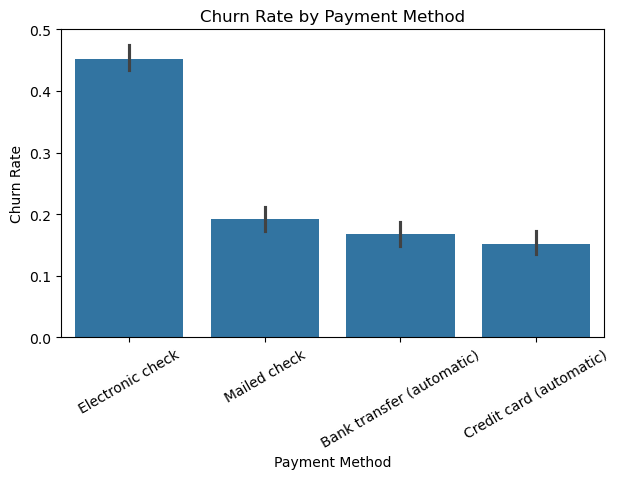

In [58]:
plt.figure(figsize=(7,4))
sns.barplot(x="Payment Method",y="Churn Value",data=df_churn,order=["Electronic check","Mailed check","Bank transfer (automatic)","Credit card (automatic)"])
plt.title("Churn Rate by Payment Method")
plt.ylabel("Churn Rate")
plt.xticks(rotation=30)
plt.ylim(0,0.5)
plt.show()

### Observation
Electronic check users show a churn rate of 45%, significantly higher than automatic payment methods (~15–17%).
### Interpretation
Manual payment methods are associated with higher churn.
### Business Implication
Encouraging customers to enroll in automatic billing may reduce churn.

### 6.6 Stated Churn Reasons

In [64]:
df_churn[df_churn["Churn Value"]==1]['Churn Reason'].value_counts()

Churn Reason
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Lack of affordable download/upload speed      44
Limited range of services                     44
Long distance charges                         44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: c

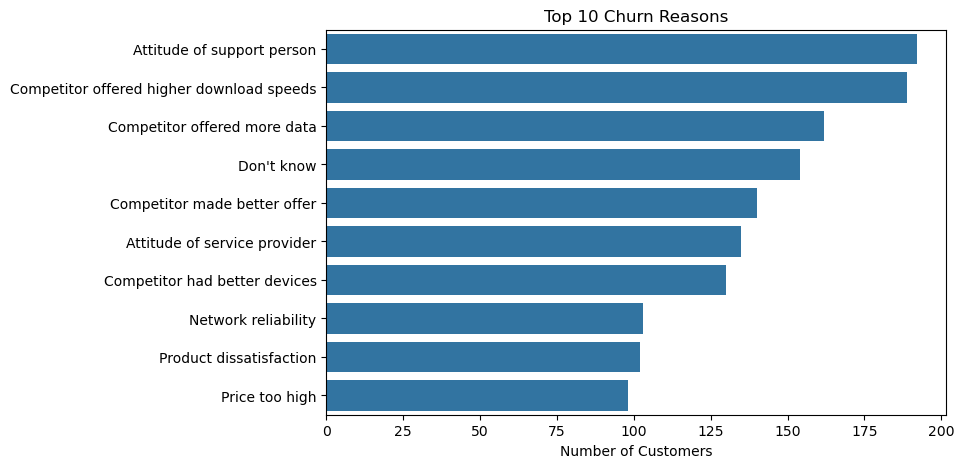

In [65]:
top_reasons = (
    df_churn[df_churn["Churn Value"] == 1]["Churn Reason"]
    .value_counts()
    .head(10)
)

plt.figure(figsize=(8,5))
sns.barplot(x=top_reasons.values, y=top_reasons.index)
plt.title("Top 10 Churn Reasons")
plt.xlabel("Number of Customers")
plt.ylabel("")
plt.show()

### Observation
Top churn reasons include competitor offers, support attitude, service dissatisfaction, and pricing concerns.
### Interpretation
Churn is driven primarily by competitive pressure and service quality issues.
### Business Implication
Improving service quality and competitive positioning is critical to reducing churn.

## 7. Customer Lifetime Value Impact

In [66]:
df_churn.groupby("Churn Value")["CLTV"].mean()

Churn Value
0    4492.679837
1    4149.414660
Name: CLTV, dtype: float64

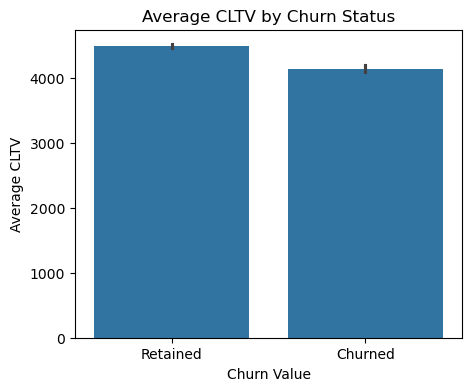

In [67]:
plt.figure(figsize=(5,4))
sns.barplot(x="Churn Value", y="CLTV", data=df_churn)
plt.title("Average CLTV by Churn Status")
plt.xticks([0,1], ["Retained", "Churned"])
plt.ylabel("Average CLTV")
plt.show()


### Observation
Retained customers have an average CLTV of approximately $4,492, while churned customers average around $4,149.
### Interpretation
Churned customers tend to have slightly lower lifetime value compared to retained customers. This suggests that higher-value customers may be more loyal and less likely to leave.
### Business Implication
Although churn primarily affects lower-value segments, reducing churn across early-tenure and high-risk contract groups can still significantly improve long-term revenue stability.